# Ames Housing Project Part 1 - Data cleaning and EDA

---

_Author: Matthew Hill_

### Importing Data
---

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
import pickle

In [170]:
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

In [171]:
df_train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [172]:
df_test.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New


### Create Baseline for Test Data
---

In [173]:
df_test['SalePrice'] = df_train['SalePrice'].mean()

In [174]:
df_train['SalePrice'].mean()

181469.70160897123

### Create Submission Format
---

In [175]:
submission = df_test[['Id', 'SalePrice']] 

submission.set_index('Id', inplace=True) 

submission.head(3)

,SalePrice
Id,
2658,181469.701609
2718,181469.701609
2414,181469.701609


### Find Correlation
---

In [176]:
df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).head(3)

,SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038


In [177]:
df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).tail(3)

,SalePrice
Kitchen AbvGr,-0.125444
Enclosed Porch,-0.135656
PID,-0.255052


In [178]:
df_train['Kitchen Qual'].replace(['Ex', 'Fa', 'Gd', 'TA', 'Po'], [4, 3, 2, 1, 0], inplace=True)

In [179]:
df_test['Kitchen Qual'].replace(['Ex', 'Fa', 'Gd', 'TA', 'Po'], [4, 3, 2, 1, 0], inplace=True)

In [180]:
df_test['Exter Qual'].replace(['Ex', 'Fa', 'Gd', 'TA', 'Po'], [4, 3, 2, 1, 0], inplace=True)

In [181]:
df_train['Exter Qual'].replace(['Ex', 'Fa', 'Gd', 'TA', 'Po'], [4, 3, 2, 1, 0], inplace=True)

In [182]:
df_test['Exter Cond'].replace(['Ex', 'Fa', 'Gd', 'TA', 'Po'], [4, 3, 2, 1, 0], inplace=True)

In [183]:
df_train['Exter Cond'].replace(['Ex', 'Fa', 'Gd', 'TA', 'Po'], [4, 3, 2, 1, 0], inplace=True)

### Removing Noisy features making a Subset

--- 

Subset of columns great than 0 correlation and less than -0.1 correlation.

In [184]:
df_train = df_train[['Id', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',  'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Mas Vnr Area', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF', 'Kitchen AbvGr', 'Enclosed Porch', 'Bsmt Unf SF', 'Bedroom AbvGr', 'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Kitchen Qual', 'Exter Cond', 'Exter Qual', 'SalePrice',]]

In [185]:
df_test = df_test[['Id', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',  'Full Bath', 'Garage Yr Blt', 'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Mas Vnr Area', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF', 'Kitchen AbvGr', 'Enclosed Porch', 'Bsmt Unf SF', 'Bedroom AbvGr', 'Screen Porch', '3Ssn Porch', 'Mo Sold', 'Pool Area', 'BsmtFin SF 2', 'Kitchen Qual', 'Exter Cond', 'Exter Qual', 'SalePrice']]

In [186]:
df_train.head(3)

,Id,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,...,Bedroom AbvGr,Screen Porch,3Ssn Porch,Mo Sold,Pool Area,BsmtFin SF 2,Kitchen Qual,Exter Cond,Exter Qual,SalePrice
0,109,6,1479,475.0,2.0,725.0,725,1976,2005,2,...,3,0,0,3,0,0.0,2,1,2,130500
1,544,7,2122,559.0,2.0,913.0,913,1996,1997,2,...,4,0,0,4,0,0.0,2,1,2,220000
2,153,5,1057,246.0,1.0,1057.0,1057,1953,2007,1,...,3,0,0,1,0,0.0,2,2,1,109000


In [187]:
df_test.head()

,Id,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,...,Bedroom AbvGr,Screen Porch,3Ssn Porch,Mo Sold,Pool Area,BsmtFin SF 2,Kitchen Qual,Exter Cond,Exter Qual,SalePrice
0,2658,6,1928,440,1,1020,908,1910,1950,2,...,4,0,0,4,0,0,3,3,1,181469.701609
1,2718,5,1967,580,2,1967,1967,1977,1977,2,...,6,0,0,8,0,0,1,1,1,181469.701609
2,2414,7,1496,426,2,654,664,2006,2006,2,...,3,0,0,9,0,0,2,1,2,181469.701609
3,1989,5,968,480,2,968,968,1923,2006,1,...,2,0,0,7,0,0,1,1,2,181469.701609
4,625,6,1394,514,2,1394,1394,1963,1963,1,...,3,185,0,7,0,0,1,1,1,181469.701609


##### Fill empty cells with mean
---

In [188]:
df_train['Garage Cars'].fillna(value = df_train['Garage Cars'].mean(), inplace = True)

df_test['Garage Cars'].fillna(value = df_test['Garage Cars'].mean(), inplace = True)

df_train['Total Bsmt SF'].fillna(value = df_train['Total Bsmt SF'].mean(), inplace = True)

df_test['Total Bsmt SF'].fillna(value = df_train['Total Bsmt SF'].mean(), inplace = True)

df_train['Garage Yr Blt'].fillna(value = df_train['Garage Yr Blt'].mean(), inplace = True)

df_test['Garage Yr Blt'].fillna(value = df_test['Garage Yr Blt'].mean(), inplace = True)

df_train['Lot Frontage'].fillna(value = df_train['Lot Frontage'].mean(), inplace = True)

df_test['Lot Frontage'].fillna(value = df_test['Lot Frontage'].mean(), inplace = True)

df_train['Mas Vnr Area'].fillna(value = df_train['Mas Vnr Area'].mean(), inplace = True)

df_test['Mas Vnr Area'].fillna(value = df_test['Mas Vnr Area'].mean(), inplace = True)

df_train['Garage Area'].fillna(value = df_train['Garage Area'].mean(), inplace = True)

df_test['Garage Area'].fillna(value = df_test['Garage Area'].mean(), inplace = True)

df_train['BsmtFin SF 1'].fillna(value = df_train['BsmtFin SF 1'].mean(), inplace = True)

df_test['BsmtFin SF 1'].fillna(value = df_test['BsmtFin SF 1'].mean(), inplace = True)


### Outliers
---

- Created NaN values for outliers
- Oultliers came from looking at resids graph

In [189]:
df_train.iloc[125, 1:17] = None 

In [190]:
df_train.iloc[960, 1:17] = None

In [191]:
df_train.iloc[1885, 1:17] = None

### _Correlation Map_

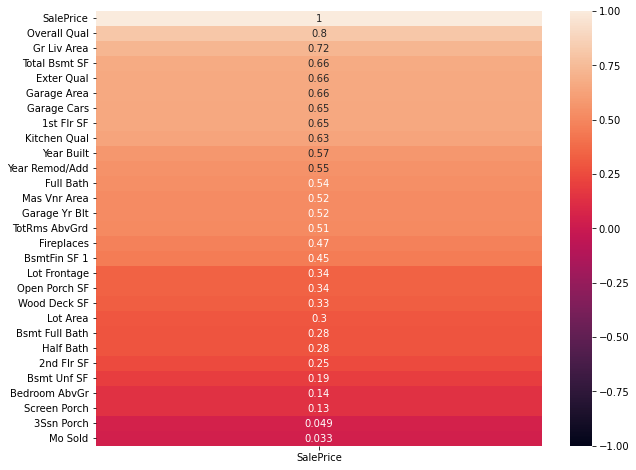

In [192]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).head(29), 
            annot=True,
           vmin=-1,
           vmax=1);

- This Heat Map shows correlation of Columns with a correlation greater than 0.

### Statistics of Each Column
---

In [193]:
df_train.describe()

,Id,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,...,Bedroom AbvGr,Screen Porch,3Ssn Porch,Mo Sold,Pool Area,BsmtFin SF 2,Kitchen Qual,Exter Cond,Exter Qual,SalePrice
count,2051.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,6.106934,1494.846191,472.687828,1.775282,1053.581049,1160.634277,1971.670898,1984.169922,1.576660,...,2.843491,16.511458,2.591419,6.219893,2.397855,47.959024,1.659678,1.161872,1.483667,181469.701609
std,843.980841,1.420690,484.845907,214.327189,0.763937,426.281413,379.034946,30.178432,21.037325,0.549443,...,0.826618,57.374204,25.229615,2.744736,37.782570,165.000901,0.844048,0.453850,0.715747,79258.659352
min,1.000000,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,12789.000000
25%,753.500000,5.000000,1128.000000,319.000000,1.000000,793.000000,879.000000,1953.000000,1964.000000,1.000000,...,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,129825.000000
50%,1486.000000,6.000000,1443.000000,480.000000,2.000000,994.500000,1092.000000,1974.000000,1993.000000,2.000000,...,3.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,162500.000000
75%,2198.000000,7.000000,1728.000000,576.000000,2.000000,1317.250000,1403.250000,2001.000000,2004.000000,2.000000,...,3.000000,0.000000,0.000000,8.000000,0.000000,0.000000,2.000000,1.000000,2.000000,214000.000000
max,2930.000000,10.000000,3820.000000,1356.000000,5.000000,3206.000000,3820.000000,2010.000000,2010.000000,4.000000,...,8.000000,490.000000,508.000000,12.000000,800.000000,1474.000000,4.000000,4.000000,4.000000,611657.000000


In [194]:
df_train.to_csv('datasets/trainsubset.csv')

In [195]:
df_test.to_csv('datasets/testsubset.csv')